
# MRFM_BrownianFit h5 examples
08/5/2025

## Preliminaries

### import libraries

In [1]:
from MRFM_BrownianFit.LabVIEW_int import LVprocessing
import h5py
import os
import pandas as pd

### read in the data from an h5 file 

(8 averages from 07/01/2025)


In [2]:
# set folder path for data if not in same folder as notebook
path = r".\\"
os.chdir(path)

# read h5 file for average power spectrum

file = h5py.File(r'2025-02-06_153525_python-Brownian_16s-1x_FFT.h5', 'r')
print(file.keys())

# use pandas to extract FFT data 
df =pd.DataFrame(file["FFT"][:])

# calculate PSD: PSD [nm^2/Hz] = (FFT_Result [nm/Hz])^2 * (2*bin width [Hz])
PSD = file['FFT']['abs(FT(x)) [nm/Hz]'][:]**2*(2*((file['FFT']['Frequency [kHz]'][1]*1000)-(file['FFT']['Frequency [kHz]'][0]*1000)))
df['PSD[nm^2/Hz]'] = PSD

freq = file['FFT']['Frequency [kHz]'][:]*1000
power = PSD

# check that data is read as expected
print( len(freq), len(power))
print(freq[0], freq[-1])

temp = 294.5
n_avgs = int(1)

<KeysViewHDF5 ['FFT', 'acq', 'app', 'experimentParams', 'freqdemodParams', 'metadata', 'photodetectorChan', 'trig']>
320001 320001
63800.0 83800.0


## Run fit using MRFM_BrownianFit

### Use LVprocessing to initialize brownian_fit class

In [3]:
# set path to folder for saved plots and reports
path = r".\\example_outputs"

# set root name for plots and reports
name="2025-02-06_153525_python-Brownian_16s-1x_FFT"

#call LVprocessing class
data = LVprocessing(n_avgs, temp, list(freq), list(power), name=name, path=path, fit_range_L= 71000, fit_range_U= 77500)


### do_fit()

c:\Users\Katri\miniconda3\envs\mrfm_emcee\lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


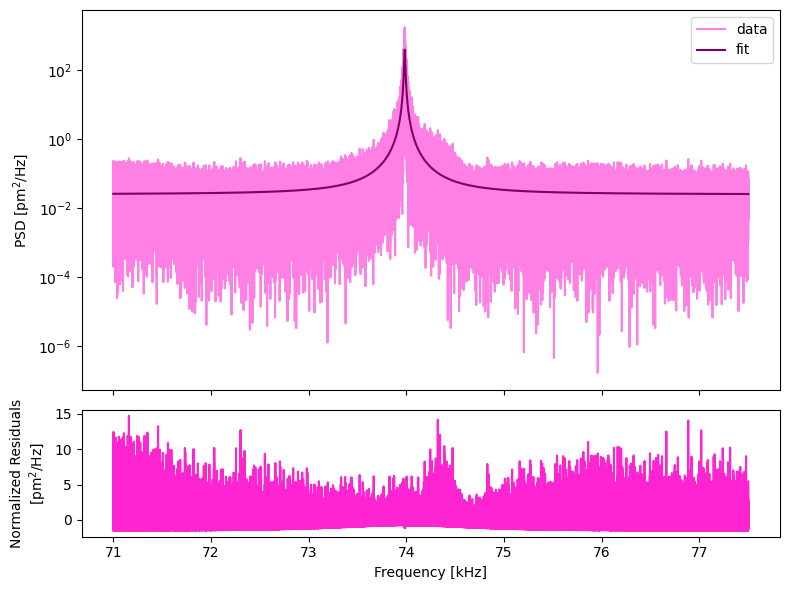

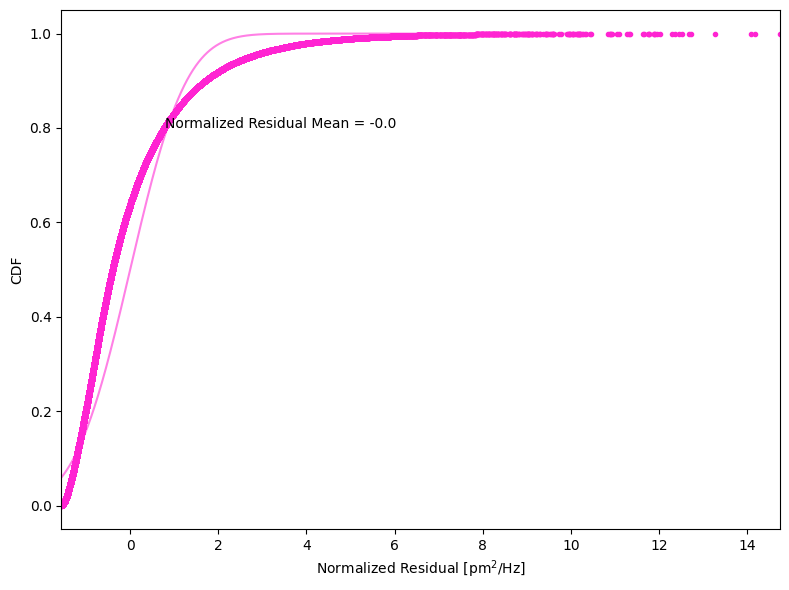

In [4]:
# run fitting function - this example will not generate the .tex report
data.do_fit()


# use brownian_fit functions to generate the fit plot and the residuals cdf
data.fit.plot_fit()
data.fit.residuals_CDF()

# print the fit summary
data.fit.result["leastsq"]

### plot_report()

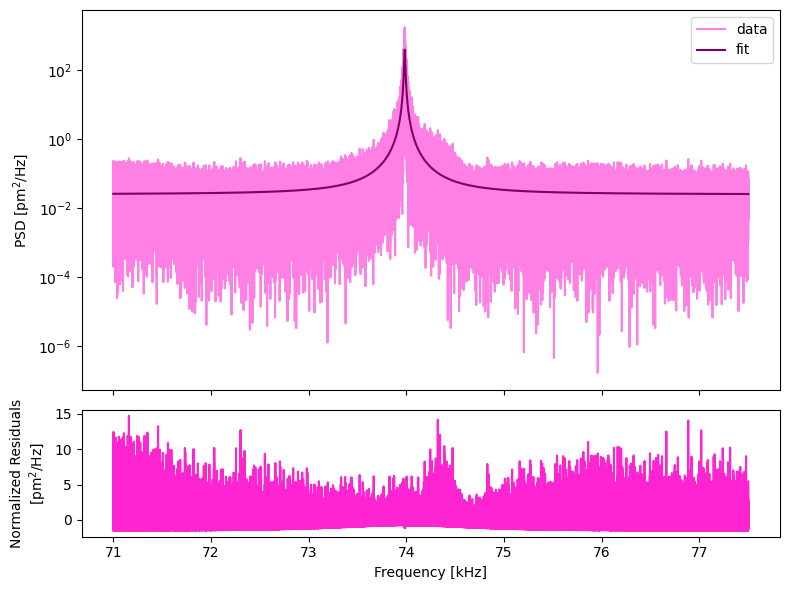

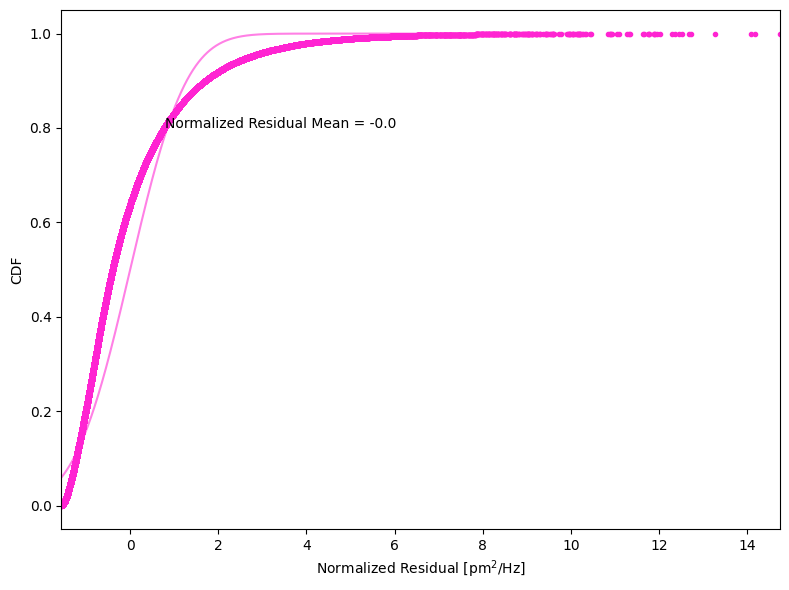

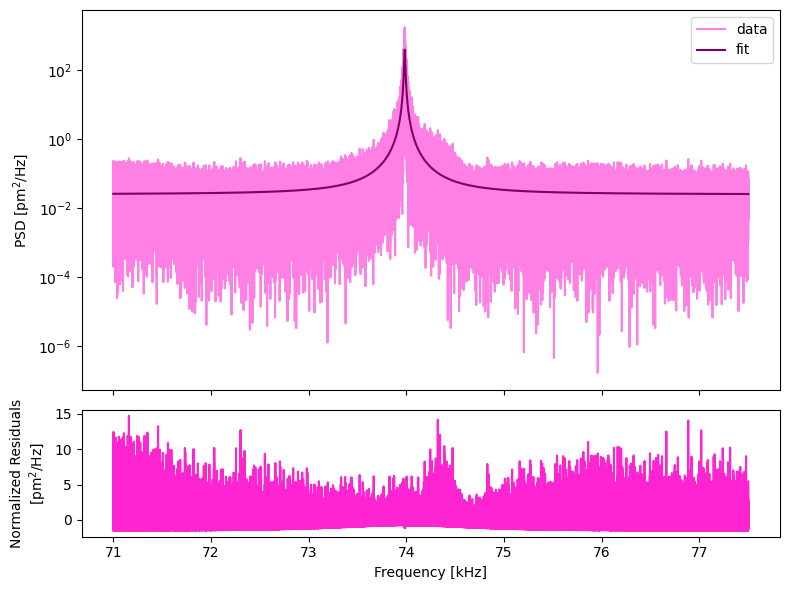

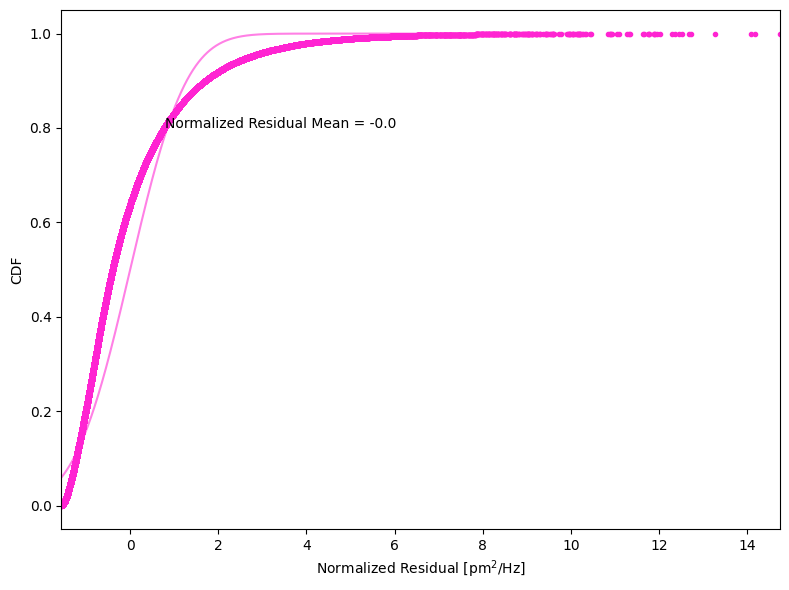

In [5]:
# run fitting function - this example will generate the .tex report
data.plot_report()

# use brownian_fit functions to generate the fit plot and the residuals cdf
data.fit.plot_fit()
data.fit.residuals_CDF()

# print the fit summary
data.fit.result["leastsq"]

In [6]:
print(data.fit.k/1000, data.fit.k_stderr/1000)
print(data.fit.Q, data.fit.Q_stderr)

0.6868656181472964 0.09668799865448748
7602.238961861983 441.5039957990044


## Use Bayesian methods to explore parameter distributions

### Maximum Log Likelihood Estimates

In [11]:
# define parameter bounds for Gamma, tau0, f0, and baseline
bounds = [(1e-16,1e-7),(1,5000),(60,80),(1,50)]

# find maximum log likelihood estimate
data.fit.max_likelihood(bounds)

print(data.fit.bayesian_result)

{'Gamma': 1.9238507051240774e-10, 'tau0': 31.410998178044316, 'f0': 73.98238666221665, 'baseline': 0.024214044806178364, 'message': 'Optimization terminated successfully.'}


### MCMC

Running emcee sampler...


  0%|          | 0/2000 [00:00<?, ?it/s]c:\Users\Katri\miniconda3\envs\mrfm_emcee\lib\site-packages\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 2000/2000 [00:06<00:00, 311.34it/s]


Plotting walkers...


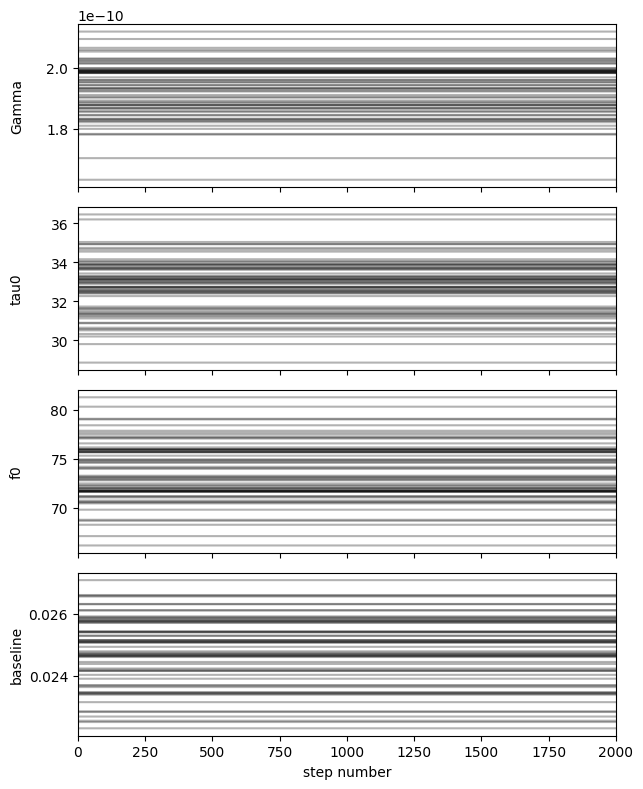

Calculating autocorrelation times...
[nan nan nan nan]


c:\Users\Katri\miniconda3\envs\mrfm_emcee\lib\site-packages\emcee\autocorr.py:38: RuntimeWarning: invalid value encountered in divide
  acf /= acf[0]


ValueError: cannot convert float NaN to integer

In [12]:
data.fit.MCMC(bounds, figpath = path)